# EDA cho tập train (user-item-rating)

File: `train.txt`

Cấu trúc: `user_id, item_id, rating (1–5)`

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

# Đường dẫn file (cập nhật lại nếu khác)
PATH = "train.txt"  # hoặc đường dẫn đầy đủ nếu cần

## 1. Đọc dữ liệu & xem nhanh

In [4]:
TRAIN_PATH = "data/train.txt"   # ví dụ: "/kaggle/input/.../train.txt"

df = pd.read_csv(
    TRAIN_PATH,
    sep=r"\s+",
    header=None,
    names=["userid","movieid","rating"],
    engine="python",
)

df.head()

,userid,movieid,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90570 entries, 0 to 90569
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   userid   90570 non-null  int64
 1   movieid  90570 non-null  int64
 2   rating   90570 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB


In [8]:
print("Kích thước dữ liệu:", df.shape)
print("Số user khác nhau:", df["userid"].nunique())
print("Số item khác nhau:", df["movieid"].nunique())
print("Giá trị rating duy nhất:", sorted(df["rating"].unique()))

Kích thước dữ liệu: (90570, 3)
Số user khác nhau: 943
Số item khác nhau: 1680
Giá trị rating duy nhất: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


## 2. Kiểm tra missing, giá trị bất thường

In [9]:
df.isna().sum()

userid     0
movieid    0
rating     0
dtype: int64

In [10]:
# Kiểm tra rating có nằm ngoài [1,5] không
print("Min rating:", df["rating"].min())
print("Max rating:", df["rating"].max())

# Nếu muốn lọc các dòng rating lỗi (nếu có)
invalid = df[(df["rating"] < 1) | (df["rating"] > 5)]
print("Số dòng rating bất thường:", len(invalid))
invalid.head()

Min rating: 1
Max rating: 5
Số dòng rating bất thường: 0


,userid,movieid,rating


## 3. Thống kê rating toàn cục

In [11]:
df["rating"].describe()

count    90570.000000
mean         3.523827
std          1.126073
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [12]:
rating_counts = df["rating"].value_counts().sort_index()
rating_probs = rating_counts / len(df)

print("Đếm số lượng từng rating:")
print(rating_counts)
print("\nTỉ lệ phần trăm:")
print((rating_probs * 100).round(2))

Đếm số lượng từng rating:
rating
1     5568
2    10375
3    24721
4    30858
5    19048
Name: count, dtype: int64

Tỉ lệ phần trăm:
rating
1     6.15
2    11.46
3    27.29
4    34.07
5    21.03
Name: count, dtype: float64


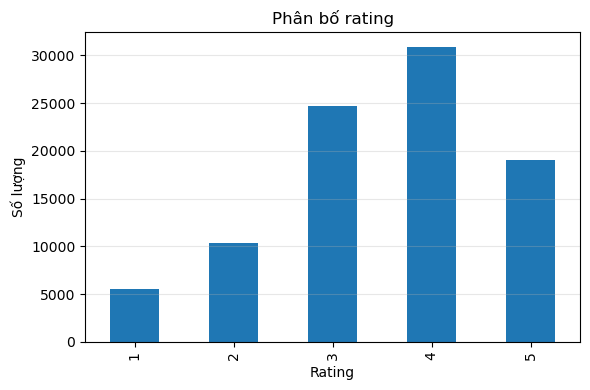

In [13]:
plt.figure(figsize=(6,4))
rating_counts.plot(kind="bar")
plt.title("Phân bố rating")
plt.xlabel("Rating")
plt.ylabel("Số lượng")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

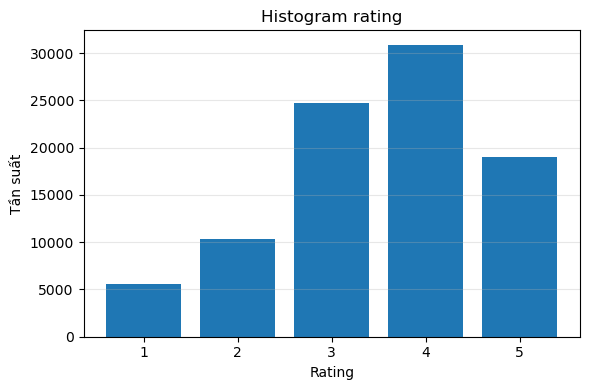

In [14]:
plt.figure(figsize=(6,4))
plt.hist(df["rating"], bins=np.arange(0.5, 5.6, 1), rwidth=0.8)
plt.xticks([1,2,3,4,5])
plt.title("Histogram rating")
plt.xlabel("Rating")
plt.ylabel("Tần suất")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Thống kê mức độ hoạt động của user

* Số rating mỗi user
* Top user hoạt động nhiều nhất
* Phân bố số rating/user

In [16]:
user_counts = df.groupby("userid")["movieid"].count().rename("n_items")
user_counts.describe()

count    943.000000
mean      96.044539
std      100.931743
min       10.000000
25%       23.000000
50%       55.000000
75%      138.000000
max      727.000000
Name: n_items, dtype: float64

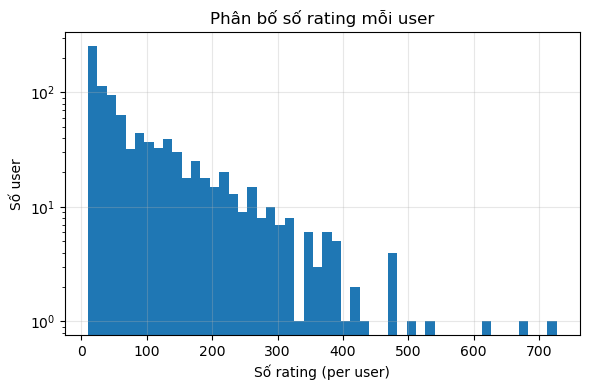

In [17]:
plt.figure(figsize=(6,4))
plt.hist(user_counts, bins=50)
plt.title("Phân bố số rating mỗi user")
plt.xlabel("Số rating (per user)")
plt.ylabel("Số user")
plt.yscale("log")  # log-scale để dễ nhìn nếu lệch nhiều
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
top_users = user_counts.sort_values(ascending=False).head(20)
top_users

userid
405    727
655    675
13     626
450    530
276    508
416    483
537    480
303    474
234    470
393    438
181    425
279    424
429    404
846    395
7      393
94     390
682    389
308    387
293    378
92     378
Name: n_items, dtype: int64

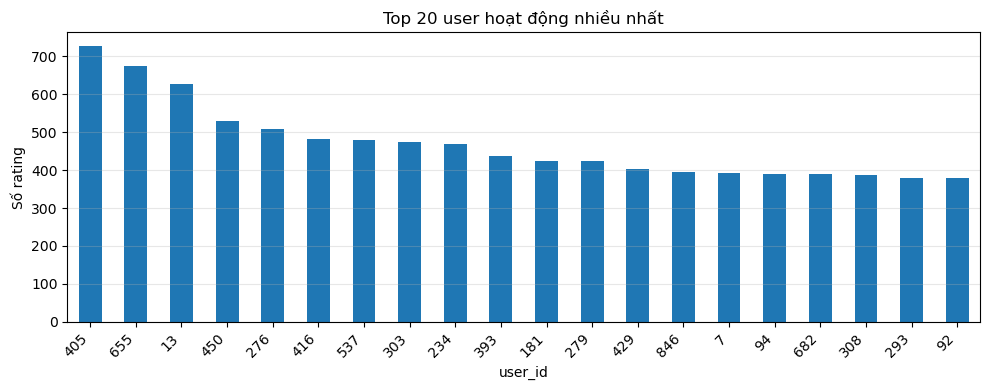

In [19]:
plt.figure(figsize=(10,4))
top_users.plot(kind="bar")
plt.title("Top 20 user hoạt động nhiều nhất")
plt.xlabel("user_id")
plt.ylabel("Số rating")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Thống kê mức độ phổ biến của item

* Số rating mỗi item
* Item được đánh giá nhiều nhất
* Phân bố số rating/item

In [23]:
item_counts = df.groupby("movieid")["userid"].count().rename("n_users")
item_counts.describe()

count    1680.000000
mean       53.910714
std        71.381795
min         1.000000
25%         6.000000
50%        24.000000
75%        72.250000
max       495.000000
Name: n_users, dtype: float64

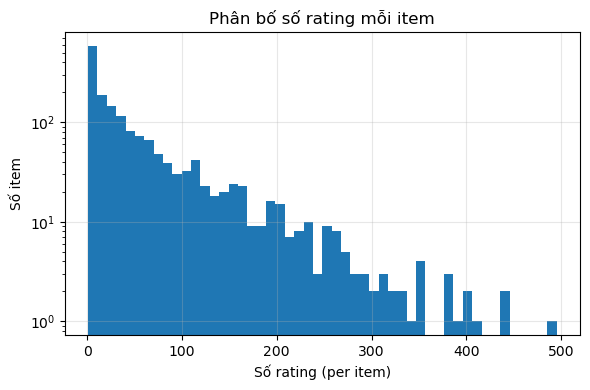

In [24]:
plt.figure(figsize=(6,4))
plt.hist(item_counts, bins=50)
plt.title("Phân bố số rating mỗi item")
plt.xlabel("Số rating (per item)")
plt.ylabel("Số item")
plt.yscale("log")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
top_items = item_counts.sort_values(ascending=False).head(20)
top_items

movieid
50     495
100    443
181    439
258    412
286    400
294    398
1      392
288    386
121    384
174    379
127    352
98     350
56     348
300    347
7      346
237    335
172    330
222    322
117    320
204    311
Name: n_users, dtype: int64

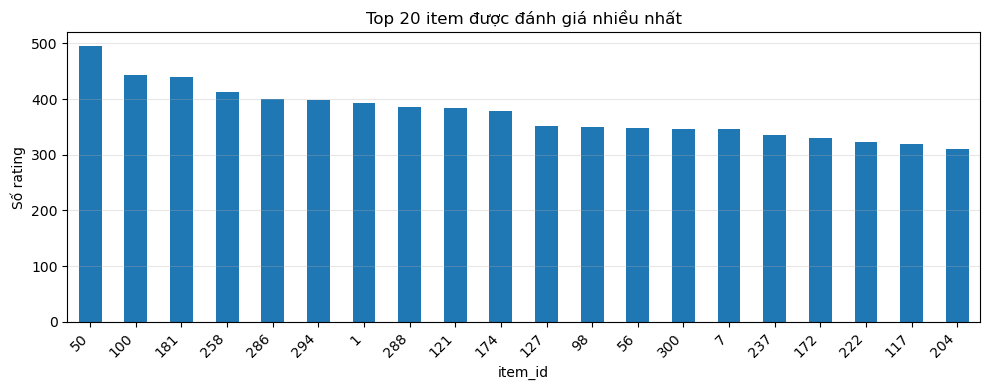

In [26]:
plt.figure(figsize=(10,4))
top_items.plot(kind="bar")
plt.title("Top 20 item được đánh giá nhiều nhất")
plt.xlabel("item_id")
plt.ylabel("Số rating")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## 6. User bias & Item bias (trung bình rating theo user / item)

* User nào cực kỳ khó tính / dễ tính?
* Item nào bị đánh giá cao/thấp bất thường?

In [27]:
user_mean_rating = df.groupby("userid")["rating"].mean().rename("user_mean_rating")
user_mean_rating.describe()

count    943.000000
mean       3.587749
std        0.452710
min        1.489412
25%        3.318609
50%        3.623288
75%        3.888889
max        4.928571
Name: user_mean_rating, dtype: float64

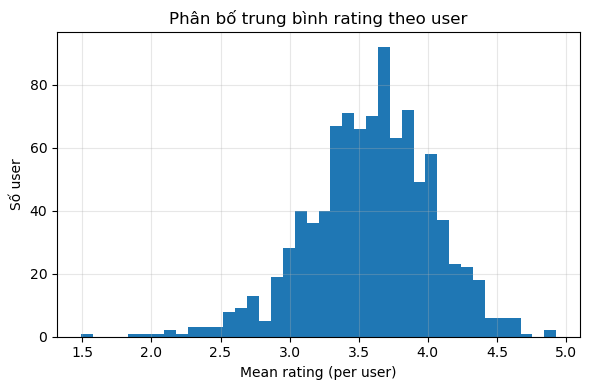

In [28]:
plt.figure(figsize=(6,4))
plt.hist(user_mean_rating, bins=40)
plt.title("Phân bố trung bình rating theo user")
plt.xlabel("Mean rating (per user)")
plt.ylabel("Số user")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
item_mean_rating = df.groupby("movieid")["rating"].mean().rename("item_mean_rating")
item_mean_rating.describe()

count    1680.000000
mean        3.066792
std         0.790114
min         1.000000
25%         2.633856
50%         3.153194
75%         3.648611
max         5.000000
Name: item_mean_rating, dtype: float64

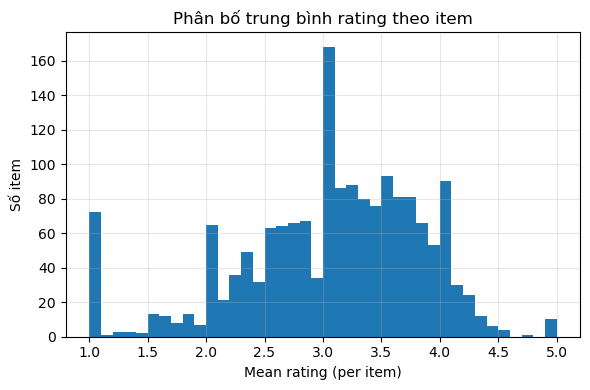

In [31]:
plt.figure(figsize=(6,4))
plt.hist(item_mean_rating, bins=40)
plt.title("Phân bố trung bình rating theo item")
plt.xlabel("Mean rating (per item)")
plt.ylabel("Số item")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
# Một vài user "dễ tính" nhất (mean rating cao) – lọc những user có ít nhất 10 rating cho ổn định
active_users = user_counts[user_counts >= 10].index
user_mean_active = user_mean_rating.loc[active_users]

print("Top 10 user dễ tính:")
display(user_mean_active.sort_values(ascending=False).head(10))

print("\nTop 10 user khó tính:")
display(user_mean_active.sort_values(ascending=True).head(10))

Top 10 user dễ tính:


userid
688    4.928571
849    4.846154
507    4.708333
583    4.647059
225    4.647059
928    4.636364
118    4.622951
907    4.605839
628    4.588235
469    4.575758
Name: user_mean_rating, dtype: float64


Top 10 user khó tính:


userid
181    1.489412
405    1.839065
445    2.000000
774    2.074766
685    2.100000
206    2.111111
724    2.213333
865    2.267857
762    2.272727
824    2.300000
Name: user_mean_rating, dtype: float64

In [33]:
# Một vài item được đánh giá cao/thấp nhất – lọc item có >= 20 rating
popular_items = item_counts[item_counts >= 20].index
item_mean_popular = item_mean_rating.loc[popular_items]

print("Top 10 item được đánh giá cao nhất:")
display(item_mean_popular.sort_values(ascending=False).head(10))

print("\nTop 10 item bị đánh giá thấp nhất:")
display(item_mean_popular.sort_values(ascending=True).head(10))

Top 10 item được đánh giá cao nhất:


movieid
114    4.491525
408    4.480769
169    4.476636
318    4.475836
483    4.459821
64     4.457364
12     4.386454
603    4.374359
50     4.365657
178    4.327434
Name: item_mean_rating, dtype: float64


Top 10 item bị đánh giá thấp nhất:


movieid
457     1.739130
375     1.863636
743     1.894737
368     1.933333
1215    1.933333
688     1.944444
890     1.951220
352     1.954545
564     2.040000
398     2.043478
Name: item_mean_rating, dtype: float64

## 7. Mật độ (sparsity) của ma trận user–item trong train

Dù chỉ có tập train, ta vẫn có thể ước lượng độ thưa:

\[
\text{sparsity} = 1 - \frac{\#\text{rating}}{\#\text{user} \times \#\text{item}}
\]

In [34]:
n_users = df["userid"].nunique()
n_items = df["movieid"].nunique()
n_ratings = len(df)

density = n_ratings / (n_users * n_items)
sparsity = 1 - density

print(f"Số user    : {n_users}")
print(f"Số item    : {n_items}")
print(f"Số rating  : {n_ratings}")
print(f"Mật độ     : {density:.6f}")
print(f"Độ thưa    : {sparsity:.6f}")

Số user    : 943
Số item    : 1680
Số rating  : 90570
Mật độ     : 0.057169
Độ thưa    : 0.942831


## 8. Nhìn thử ma trận user–item (mẫu nhỏ)

Ta chỉ vẽ với một số user/item đầu tiên để trực quan (tránh ma trận quá to).

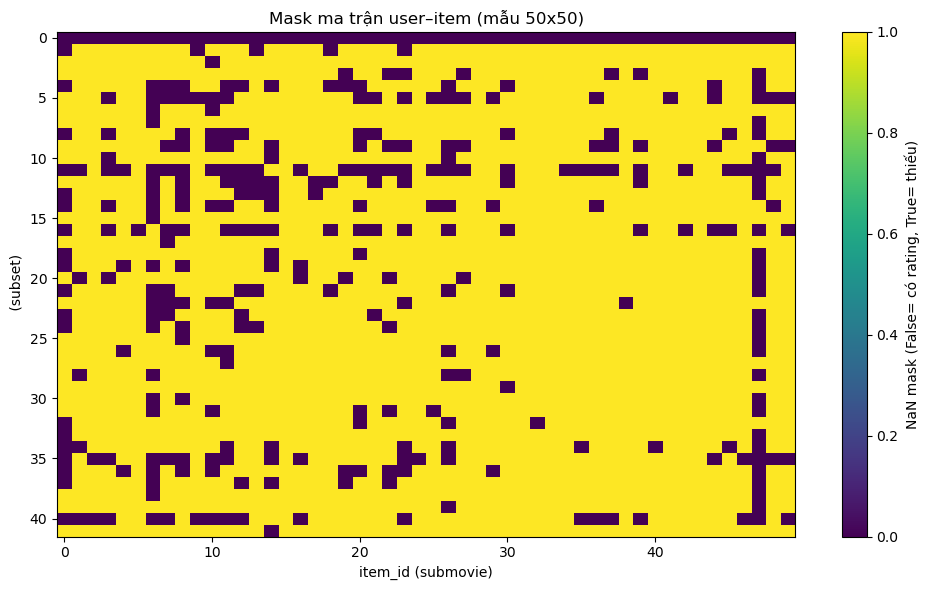

In [37]:
sample_users = df["userid"].drop_duplicates().head(50)
sample_items = df["movieid"].drop_duplicates().head(50)

sub = df[df["userid"].isin(sample_users) & df["movieid"].isin(sample_items)]

matrix = sub.pivot_table(index="userid", columns="movieid", values="rating")

plt.figure(figsize=(10,6))
plt.imshow(matrix.isna(), aspect="auto", interpolation="nearest")
plt.colorbar(label="NaN mask (False= có rating, True= thiếu)")
plt.title("Mask ma trận user–item (mẫu 50x50)")
plt.xlabel("item_id (submovie)")
plt.ylabel(" (subset)")
plt.tight_layout()
plt.show()

## 9. Một số gợi ý chuẩn bị cho mô hình

- Có thể chuẩn hoá rating (trừ đi mean user, hoặc mean item).
- Có thể loại bỏ:
  * User có quá ít rating (ví dụ < 5) để tránh quá cold.
  * Item có quá ít rating (ví dụ < 5) để giảm nhiễu.
- Sau EDA, ta có thể:
  * Chia train/validation theo user–item (random split) cho bài explicit rating.
  * Hoặc đảm bảo mỗi user xuất hiện ở cả train và val.

In [39]:
# Ví dụ: lọc user & item có ít nhất 5 rating (chỉ là minh hoạ, tuỳ bạn chọn ngưỡng)
min_user_ratings = 5
min_item_ratings = 5

good_users = user_counts[user_counts >= min_user_ratings].index
good_items = item_counts[item_counts >= min_item_ratings].index

df_filtered = df[df["userid"].isin(good_users) & df["movieid"].isin(good_items)]

print("Kích thước ban đầu :", df.shape)
print("Kích thước sau lọc :", df_filtered.shape)

Kích thước ban đầu : (90570, 3)
Kích thước sau lọc : (89833, 3)
